In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = pd.read_csv("Silviculture_Reforestation_(Feature_Layer).csv")
db

/var/folders/r6/wf9kkdds6ms19lwmkq9ysb3w0000gn/T/ipykernel_39266/4174624597.py:5: DtypeWarning: Columns (11,41,52) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv("Silviculture_Reforestation_(Feature_Layer).csv")


,OBJECTID,REGION_CODE,ADMIN_FOREST_CODE,ADMIN_FOREST_NAME,PROCLAIMED_FOREST_CODE,ADMIN_DISTRICT_NAME,DISTRICT_CODE,HOME_ORG,ACTIVITY_UNIT_ORG,SUID,...,ETL_MODIFIED_DATE,REV_DATE,UK_TABULAR,UK,DATA_SOURCE_CODE,EVENT_YEAR,EVENT_NAME,GLOBALID,SHAPEAREA,SHAPELEN
0,1119345,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A130300053000,...,NaN,2016/10/27 15:54:08+00,5330688010602_011607A130300053000,0116_20711_ACTP,3.0,2017.0,BURNING,{5A809AB6-A303-40A0-90FB-4C60A7B9FF2D},0.000015,0.015903
1,1119763,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A670200144000,...,NaN,2017/05/18 17:37:18+00,5780059010602_011607A670200144000,0116_129946_ACTP,3.0,2019.0,JOHNSON CAMP TIMBER SALE,{150D2A5C-371E-497A-87C6-B54737B8C428},0.000007,0.011594
2,1120521,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A130200149000,...,NaN,2016/09/30 16:16:06+00,5322518010602_011607A130200149000,0116_50331_ACTP,3.0,2017.0,BURNING,{2C8599C5-E2B7-4A77-B08D-66F127F79464},0.000003,0.008151
3,1120534,1,16,Lolo National Forest,116.0,Missoula Ranger District,3,11603,11603,011603RA20170036000,...,NaN,2021/09/22 18:48:17+00,6245442010602_011603RA20170036000,0116_182467_ACTP,2.0,2017.0,LOLO PEAK,{78DFF72E-FE82-4FE4-8CFB-64E65C1CD048},0.000008,0.017492
4,1120711,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A670200143000,...,NaN,2017/05/18 16:12:28+00,5441878010602_011607A670200143000,0116_129937_ACTP,3.0,2024.0,BURNING,{EAB49B9F-705E-449C-B111-7AF64240966A},0.000006,0.010164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428354,2105772,9,9,Superior National Forest,909.0,Kawishiwi Ranger District,5,90905,90905,0909050000109026000,...,NaN,2019/09/03 21:24:30+00,5896964010602_0909050000109026000,0909_114588_ACTP,NaN,2019.0,OYSTER STEWARDSHIP,{1E6C1C96-2A1C-4863-B964-A804B72BAE88},0.000004,0.010500
428355,2105773,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124034000,...,NaN,NaN,5479927010602_0905230000124034000,0905_1249_ACTP,NaN,2017.0,HOG SUCKER,{15D67AF0-F6D5-489C-A188-6C49F23858F5},0.000003,0.007593
428356,2105774,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124044000,...,NaN,2018/09/06 16:38:35+00,5480036010602_0905230000124044000,0905_179130_ACTP,NaN,2017.0,HOG SUCKER,{D010D54F-A6EF-481A-92CF-D5B3B0F0E8C4},0.000002,0.005258
428357,2105775,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124036000,...,NaN,2018/09/06 16:38:35+00,5480029010602_0905230000124036000,0905_179128_ACTP,NaN,2017.0,HOG SUCKER,{E7C4DCA1-877F-4D91-BE2C-F29B45B4038D},0.000004,0.008205


## Filtering out columns
ACTIVITY_NAME - reforestation activity performed \
NBR_UNITS_PLANNED - number of units planned for treatment \
NBR_UNITS_ACCOMPLISHED - number of units actually treated \
DATE_PLANNED - scheduled date for the activity to be completed \
DATE_COMPLETED - actual date when the activity was completed \
FY_PLANNED - fiscal year work was planned to be done \
FY_AWARDED - fiscal year when the funding was approved \
COST_PER_UOM - estimated cost per unit of measure in $$ \
TREATMENT_TYPE - type of treatment method used \
STATE_ABBR - abbreviation for the US state eg CA \
PRODUCTIVITY_CLASS_DESC - forest land’s timber productivity rating \
LAND_SUITABILITY_CLASS_DESC - how the land is legally/ecologically suited for forestry \
GIS_ACRES - geographic area in acres \
STAGE - encoded stage value (1=NEPA, 2=Layout, 3=Accomplished) \
STAGE_DESC - readable description of the stage \
ACCURACY - \
EVENT_YEAR - year in which a causal event (like wildfire) happened \
SHAPEAREA - polygon area of the spatial unit in (map coordinate units squared)^2 \
SHAPELEN - perimeter length of the unit in (map coordinate units squared) \
ACTIVITY_CODE - numerical code identifying the type of silvicultural activity \
ADMIN_FOREST_NAME - name of the US Forest that manages the land \
ADMIN_DISTRICT_NAME - name of the district in the forest \
REGION_CODE - numeric code for the US Forest Service Region \
UOM - unit of measure (acres, etc) \
ELEVATION - average elevation of treated area \
SLOPE - percent slope or incline of the land \
ASPECT - direction the land faces \
DATA_SOURCE_DESC - describes the method used to record spatial data eg GPS \
CAUSAL_AGENT - main cause behind the reforestation need \

In [95]:
columns_to_keep = [
    # Fields we found as a team:
    "ACTIVITY_NAME", "NBR_UNITS_PLANNED", "NBR_UNITS_ACCOMPLISHED", "DATE_PLANNED", "DATE_COMPLETED", "FY_PLANNED", "FY_AWARDED",
    "COST_PER_UOM", "TREATMENT_TYPE", "STATE_ABBR", "PRODUCTIVITY_CLASS_DESC", "LAND_SUITABILITY_CLASS_DESC", "GIS_ACRES", "STAGE",
    "STAGE_DESC", "ACCURACY", "EVENT_YEAR", "SHAPEAREA", "SHAPELEN",
    # Additional fields  I found:
    "ACTIVITY_CODE", "ADMIN_FOREST_NAME", "ADMIN_DISTRICT_NAME", "REGION_CODE", "UOM", "ELEVATION", "SLOPE", "ASPECT", "DATA_SOURCE_DESC",
    "CAUSAL_AGENT"
]
# Need to make sure if these columns truly exist and I didn't misinterpret https://www.arcgis.com/sharing/rest/content/items/8e83d9c39f494753b77cef41ad91262c/info/metadata/metadata.xml?format=default&output=html *eyeroll*
#missing_cols = [col for col in columns_to_keep if col not in db.columns]
#print("Missing columns:", missing_cols)
df = db[[col for col in columns_to_keep if col in db.columns]].copy()
df

,ACTIVITY_NAME,NBR_UNITS_PLANNED,NBR_UNITS_ACCOMPLISHED,DATE_PLANNED,DATE_COMPLETED,FY_PLANNED,FY_AWARDED,COST_PER_UOM,TREATMENT_TYPE,STATE_ABBR,...,ACTIVITY_CODE,ADMIN_FOREST_NAME,ADMIN_DISTRICT_NAME,REGION_CODE,UOM,ELEVATION,SLOPE,ASPECT,DATA_SOURCE_DESC,CAUSAL_AGENT
0,Site Preparation for Natural Regeneration - Bu...,31.0,31.0,2023/10/06 00:00:00+00,2023/10/06 00:00:00+00,2024,2024,76.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,4000.0,45.0,W,GPS – Differentially Corrected Data,Harvest
1,Site Preparation for Natural Regeneration - Bu...,15.0,15.0,2023/05/01 00:00:00+00,2023/10/12 00:00:00+00,2023,2024,257.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,5200.0,NaN,W,GPS – Differentially Corrected Data,Harvest
2,Site Preparation for Natural Regeneration - Bu...,7.0,7.0,2023/10/23 00:00:00+00,2023/10/23 00:00:00+00,2024,2024,125.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,4700.0,25.0,NW,GPS – Differentially Corrected Data,Harvest
3,Certification of Natural Regeneration without ...,16.0,16.0,2023/10/01 00:00:00+00,2023/10/30 00:00:00+00,2024,2024,2.0,NaN,MT,...,4382,Lolo National Forest,Missoula Ranger District,1,ACRES,4200.0,55.0,SE,GPS – Uncorrected Data,Fire
4,Site Preparation for Natural Regeneration - Bu...,13.0,13.0,2023/10/09 00:00:00+00,2023/10/09 00:00:00+00,2024,2024,257.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,5200.0,NaN,W,GPS – Differentially Corrected Data,Harvest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428354,Certification of Natural Regeneration without ...,7.0,7.0,2024/06/01 00:00:00+00,2024/06/10 00:00:00+00,2024,2024,4.0,NaN,MN,...,4382,Superior National Forest,Kawishiwi Ranger District,9,ACRES,NaN,NaN,NaN,NaN,Harvest
428355,Plant Trees,8.0,8.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,L,NaN,Harvest
428356,Plant Trees,3.0,3.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,NW,NaN,Harvest
428357,Plant Trees,10.0,10.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,E,NaN,Harvest


## Creating one new field
DELAY_IN_DAYS = number of extra days after the scheduled date, it took for an activity to be completed

In [96]:
#df.info()
df["DATE_PLANNED"] = pd.to_datetime(df["DATE_PLANNED"])
df["DATE_COMPLETED"] = pd.to_datetime(df["DATE_COMPLETED"])
df["DELAY_IN_DAYS"] = (df["DATE_COMPLETED"]-df["DATE_PLANNED"]).dt.days
df["DELAY_IN_DAYS"]


0           0.0
1         164.0
2           0.0
3          29.0
4           0.0
          ...  
428354      9.0
428355    104.0
428356    104.0
428357    104.0
428358    104.0
Name: DELAY_IN_DAYS, Length: 428359, dtype: float64

## Missing Values and Imputation
### STEP 1: Printing the values and frequencies of each categorical data
This helps us understand categorical data distribution
### STEP 2: Make all missing values uniform
Missing values can be of many types eg Unknown, NaN, etc and so I made all of them np.nan to give more struccture and uniformity
### STEP 3: Imputation
#### Broader Idea as learnt in class: 
- Numerical data -> median 
- Categorical data -> mode 

EVENT_YEAR was dropped because it is almost 85% empty \
DATE_PLANNED rows were dropped because there were only 87 missing values 
#### Categorical Data: 
If the group doesn't have a mode, I fill it with Unknown. If the group has a mode, I fill it with the mode. 
- ADMIN_FOREST_NAME's missing values were imputed by getting mode grouped by STATE_ABBR because it is categorical data 
- DATA_SOURCE_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- TREATMENT_TYPE's missing values were imputed by getting mode grouped by ACTIVITY_NAME because it is categorical data
- ASPECT's missing values were imputed by getting mode grouped by SLOPE because it is categorical data
- CAUSAL_AGENT's missing values were imputed by getting mode grouped by ACTIVITY_NAME because it is categorical data
- PRODUCTIVITY_CLASS_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- ADMIN_DISTRICT_NAME's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- LAND_SUITABILITY_CLASS_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data 
#### Numerical Data:
Imputation is done by replacing missing values with median of that group
- ACCURACY's missing values were imputed by getting median grouped by DATA_SOURCE_DESC because it is numerical data 
- COST_PER_UOM's missing values were imputed by getting median grouped by TREATMENT_TYPE because it is numerical data 
- SLOPE's missing values were imputed by getting median grouped by ADMIN_FOREST_NAME because it is numerical data 
- ELEVATION's missing values were imputed by getting median grouped by ADMIN_FOREST_NAME because it is numerical data 
- NBR_UNITS_ACCOMPLISHED's missing values were imputed by getting median grouped by ACTIVITY_NAME because it is numerical data
### STEP 4: Check how many missing values remain after imputation
DATE_COMPLETED    4268 \
DELAY_IN_DAYS     4268 \
Letting these be. DELAY_IN_DAYS missing values comes from DATE_COMPLETED missing values and we can't really impute missing values in dates.



In [97]:
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    print("COLUMN:", col)
    print(df[col].value_counts(dropna=False))
    print()

COLUMN: ACTIVITY_NAME
ACTIVITY_NAME
Plant Trees                                                195063
Certification of Natural Regeneration without Site Prep     93672
Fill-in or Replant Trees                                    46276
Site Preparation for Natural Regeneration - Other           35300
Site Preparation for Natural Regeneration - Mechanical      25408
Site Preparation for Natural Regeneration - Burning         11321
Site Preparation for Natural Regeneration - Manual           9380
Seed (Trees)                                                 7378
Site Preparation for Natural Regeneration - Chemical         3879
Fill-in Seed or Reseed Trees                                  682
Name: count, dtype: int64

COLUMN: TREATMENT_TYPE
TREATMENT_TYPE
Planting           241339
NaN                101732
Thinning            35300
Machine Pile        25408
Broadcast Burn      11321
Lop and Scatter      9380
Chemical             3879
Name: count, dtype: int64

COLUMN: STATE_ABBR
STATE_ABBR


In [98]:
# Making all missing valeus uniform yipee
missing_types = ["", " ", "  ", "n/a", "na", "none", "null", "unknown", "Unknown", "N/A", "None"]
df = df.replace(missing_types, np.nan)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

EVENT_YEAR                     368391
ACCURACY                       345872
CAUSAL_AGENT                   309409
SLOPE                          215661
ELEVATION                      197892
DATA_SOURCE_DESC               182972
ASPECT                         179911
TREATMENT_TYPE                 101732
COST_PER_UOM                    13210
PRODUCTIVITY_CLASS_DESC         11504
ADMIN_FOREST_NAME                9568
ADMIN_DISTRICT_NAME              9568
LAND_SUITABILITY_CLASS_DESC      6376
DELAY_IN_DAYS                    4355
DATE_COMPLETED                   4354
DATE_PLANNED                       87
NBR_UNITS_ACCOMPLISHED             16
dtype: int64


In [99]:
def getmode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else "Unknown"

df = df.drop(columns=["EVENT_YEAR"])
df = df.dropna(subset=["DATE_PLANNED"])
df["ADMIN_FOREST_NAME"] = df.groupby("STATE_ABBR")["ADMIN_FOREST_NAME"].transform(lambda x: x.fillna(getmode(x)))
df["DATA_SOURCE_DESC"] = df.groupby("ADMIN_FOREST_NAME")["DATA_SOURCE_DESC"].transform(lambda x: x.fillna(getmode(x)))
df["TREATMENT_TYPE"] = df.groupby("ACTIVITY_NAME")["TREATMENT_TYPE"].transform(lambda x: x.fillna(getmode(x)))
df["ACCURACY"] = df.groupby("DATA_SOURCE_DESC")["ACCURACY"].transform(lambda x: x.fillna(x.median()))
df["ACCURACY"] = df["ACCURACY"].fillna(df["ACCURACY"].median())
df["COST_PER_UOM"] = df.groupby("TREATMENT_TYPE")["COST_PER_UOM"].transform(lambda x: x.fillna(x.median()))
df["COST_PER_UOM"] = df["COST_PER_UOM"].fillna(df["COST_PER_UOM"].median())
df["SLOPE"] = df.groupby("ADMIN_FOREST_NAME")["SLOPE"].transform(lambda x: x.fillna(x.median()))
df["SLOPE"] = df["SLOPE"].fillna(df["SLOPE"].median())
df["ELEVATION"] = df.groupby("ADMIN_FOREST_NAME")["ELEVATION"].transform(lambda x: x.fillna(x.median()))
df["ELEVATION"] = df["ELEVATION"].fillna(df["ELEVATION"].median())
df["ASPECT"] = df.groupby("SLOPE")["ASPECT"].transform(lambda x: x.fillna(getmode(x)))
df["NBR_UNITS_ACCOMPLISHED"] = df.groupby("ACTIVITY_NAME")["NBR_UNITS_ACCOMPLISHED"].transform(lambda x: x.fillna(x.median()))
df["NBR_UNITS_ACCOMPLISHED"] = df["NBR_UNITS_ACCOMPLISHED"].fillna(df["NBR_UNITS_ACCOMPLISHED"].median())
df["CAUSAL_AGENT"] = df.groupby("ACTIVITY_NAME")["CAUSAL_AGENT"].transform(lambda x: x.fillna(getmode(x)))
df["PRODUCTIVITY_CLASS_DESC"] = df.groupby("ADMIN_FOREST_NAME")["PRODUCTIVITY_CLASS_DESC"].transform(lambda x: x.fillna(getmode(x)))
df["ADMIN_DISTRICT_NAME"] = df.groupby("ADMIN_FOREST_NAME")["ADMIN_DISTRICT_NAME"].transform(lambda x: x.fillna(getmode(x)))
df["LAND_SUITABILITY_CLASS_DESC"] = df.groupby("ADMIN_FOREST_NAME")["LAND_SUITABILITY_CLASS_DESC"].transform(lambda x: x.fillna(getmode(x)))


/Users/monster/Desktop/Masters/Data Mining/Project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/monster/Desktop/Masters/Data Mining/Project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/monster/Desktop/Masters/Data Mining/Project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/monster/Desktop/Masters/Data Mining/Project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/monster/Desktop/Masters/Data Mining/Project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeW

In [100]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

DATE_COMPLETED    4268
DELAY_IN_DAYS     4268
dtype: int64


## Outliers treatment 
No treatment for: FY_PLANNED, FY_AWARDED, EVENT_YEAR, ACTIVITY_CODE, REGION_CODE, DELAY_IN_DAYS \
Outlier treatment for: NBR_UNITS_PLANNED, NBR_UNITS_ACCOMPLISHED, SHAPEAREA, SHAPELEN, COST_PER_UOM, GIS_ACRES, STAGE, ACCURACY, ELEVATION, SLOPE \
Numerical data outliers are replaced by median. iqr_outlier_replace calculates that median for both cases - median of a group, global median \
For categorical, I chose a limit and replaced rows that have values less than that limit. The limit differs for each col and was gotten from looking at the data above in  Step 1 of missing values imputation.

In [101]:
def iqr_outlier_replace(df, col, group=None):
    def iqr(x):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        return q1 - 1.5 * iqr, q3 + 1.5 * iqr

    total = 0

    if group:
        for group_val, group_rows in df.groupby(group):
            lower, upper = iqr(group_rows[col].dropna())
            is_outlier = (df[group] == group_val) & ((df[col] < lower) | (df[col] > upper))
            outliers_count = is_outlier.sum()
            total += outliers_count
            median = group_rows[col].median()
            df.loc[is_outlier, col] = median
    else:
        lower, upper = iqr(df[col].dropna())
        is_outlier = (df[col] < lower) | (df[col] > upper)
        total = is_outlier.sum()
        median = df[col].median()
        df.loc[is_outlier, col] = median

    print(col, ": Replaced ", total, " outliers grouped by", group, " with median:", median)
    return df

numeric_data = [
    "NBR_UNITS_PLANNED", "NBR_UNITS_ACCOMPLISHED", "COST_PER_UOM", "GIS_ACRES", "ACCURACY", "SHAPEAREA", "SHAPELEN", "ELEVATION", "SLOPE"
]

groupedby = {
    "COST_PER_UOM": "TREATMENT_TYPE",
    "SLOPE": "ADMIN_FOREST_NAME",
    "ELEVATION": "ADMIN_FOREST_NAME",
    "ACCURACY": "DATA_SOURCE_DESC"
}

for col in numeric_data:
    if col in df.columns:
        group_col = groupedby.get(col, None)
        df = iqr_outlier_replace(df, col, group_col)

NBR_UNITS_PLANNED : Replaced  30307  outliers grouped by None  with median: 16.3
NBR_UNITS_ACCOMPLISHED : Replaced  30195  outliers grouped by None  with median: 16.0
COST_PER_UOM : Replaced  25177  outliers grouped by TREATMENT_TYPE  with median: 1.0
GIS_ACRES : Replaced  32770  outliers grouped by None  with median: 19.964
ACCURACY : Replaced  26175  outliers grouped by DATA_SOURCE_DESC  with median: 10.0
SHAPEAREA : Replaced  32899  outliers grouped by None  with median: 9.0277649909415e-06
SHAPELEN : Replaced  26433  outliers grouped by None  with median: 0.0154869533210868
ELEVATION : Replaced  19250  outliers grouped by ADMIN_FOREST_NAME  with median: 3200.0
SLOPE : Replaced  24704  outliers grouped by ADMIN_FOREST_NAME  with median: 40.0


In [102]:
def replace_categorical_outliers(x, limit=10):
    counter = x.value_counts()
    rare = counter[counter < limit].index
    return x.apply(lambda x: "Other" if x in rare else x)

# Apply it to selected columns
df["LAND_SUITABILITY_CLASS_DESC"] = replace_categorical_outliers(df["LAND_SUITABILITY_CLASS_DESC"], 10)
df["ADMIN_FOREST_NAME"] = replace_categorical_outliers(df["ADMIN_FOREST_NAME"], 10)
df["ADMIN_DISTRICT_NAME"] = replace_categorical_outliers(df["ADMIN_DISTRICT_NAME"], 5)
df["DATA_SOURCE_DESC"] = replace_categorical_outliers(df["DATA_SOURCE_DESC"], 10)
df["CAUSAL_AGENT"] = replace_categorical_outliers(df["CAUSAL_AGENT"], 50)

for col in ["LAND_SUITABILITY_CLASS_DESC", "ADMIN_FOREST_NAME", "ADMIN_DISTRICT_NAME", "DATA_SOURCE_DESC", "CAUSAL_AGENT"]:
    print(col, "value counts after cleanup:", df[col].value_counts())

LAND_SUITABILITY_CLASS_DESC value counts after cleanup: LAND_SUITABILITY_CLASS_DESC
Suitable Forest Land                            107730
Suitable-Timber                                  95899
Suitable-Timber Emphasis                         80007
500 Suitable - Timber Emphasis (RCI)             44161
Suitable Forest Land-Timber Emphasis             12492
                                                 ...  
Low Product Value                                   10
Suitable-Range Emphasis                             10
SPREN - Semiprimitive Recreation - Non Motor        10
Min. Level Alloc-Surplus Softwoods                  10
654 Suitable - Other Wildlife Emphasis(RCII)        10
Name: count, Length: 168, dtype: int64
ADMIN_FOREST_NAME value counts after cleanup: ADMIN_FOREST_NAME
Kootenai National Forest                22236
Mark Twain National Forest              19071
Umpqua National Forest                  18589
Idaho Panhandle National Forests        18434
Nez Perce-Clearwater Nat

## Data Transformation
Ordinal Data -> Integer Encoding \
Nominal Data -> One-Hot Encoding or Embedding \

For ADMIN_FOREST_NAME & ADMIN_DISTRICT_NAME, we used frequency encoding as it has high cardinality. \
Reference: https://medium.com/%40SiqiLi/frequency-encoding-4156b92e7942. 

For ASPECT, since it is directions, ther eis a logical way to convert it to numbers. Hence it was converted to degrees. \
STAGE_DESC only contains "accomplished" and so it was dropped. \
Non-Acre rows are removed from UOM to make it completely numerical. There are only 3 such rows.

Nominal Data: STATE_ABBR, TREATMENT_TYPE, LAND_SUITABILITY_CLASS_DESC, DATA_SOURCE_DESC, CAUSAL_AGENT, ACTIVITY_NAME \
Ordinal Data: PRODUCTIVITY_CLASS_DESC 

In [103]:
nominal_data_cols = ['STATE_ABBR', 'TREATMENT_TYPE', 'LAND_SUITABILITY_CLASS_DESC', 'DATA_SOURCE_DESC', 'CAUSAL_AGENT', 'ACTIVITY_NAME']
df = pd.get_dummies(df, columns=nominal_data_cols, drop_first=True)

In [104]:
productivity_class_desc_map = {
    "Less than 20 cubic feet per acre per year": 1,
    "20-49 cubic feet per acre per year": 2,
    "50-84 cubic feet per acre per year": 3,
    "85-119 cubic feet per acre per year": 4,
    "120-164 cubic feet per acre per year": 5,
    "165-224 cubic feet per acre per year": 6,
    "225 or more cubic feet per acre per year": 7,
    "Unknown": 0,
    "None (water or non-forested)": -1
}
df["PRODUCTIVITY_CLASS_INTEGER_ENCODED"] = df["PRODUCTIVITY_CLASS_DESC"].map(productivity_class_desc_map)

In [105]:
admin_forest_name_freq_map = df["ADMIN_FOREST_NAME"].value_counts().to_dict()
df["ADMIN_FOREST_FREQ"] = df["ADMIN_FOREST_NAME"].map(admin_forest_name_freq_map)
admin_district_name_freq_map = df["ADMIN_DISTRICT_NAME"].value_counts().to_dict()
df["ADMIN_DISTRICT_FREQ"] = df["ADMIN_DISTRICT_NAME"].map(admin_district_name_freq_map)

In [106]:
aspect_map = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315, 'L': -1}
df['ASPECT_DEGREES'] = df['ASPECT'].map(aspect_map)

In [107]:
df.drop(columns=['STAGE_DESC'], inplace=True)
df = df[df['UOM'] == 'ACRES'].copy()
df.drop(columns=['UOM'], inplace=True)

## Data Visualization
### Histograms
Plotted for all numeric columns that are continuous or can be counted

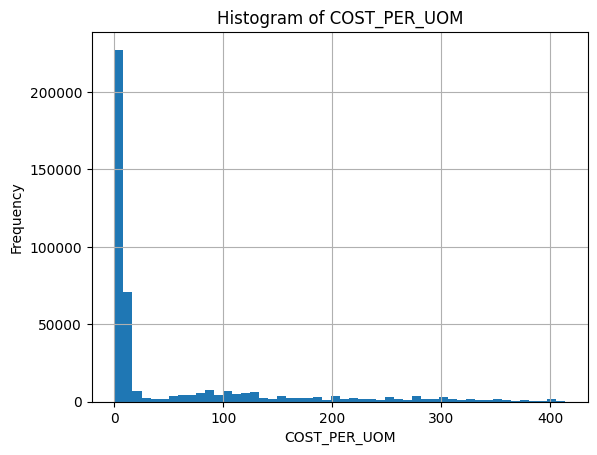

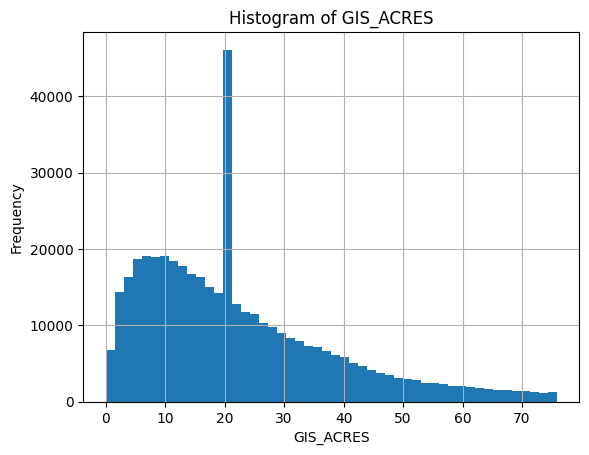

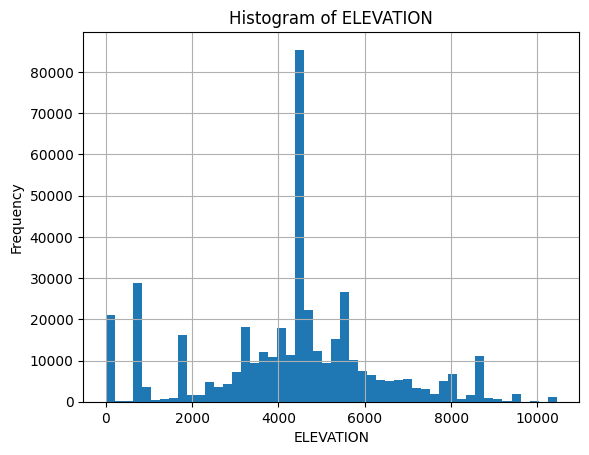

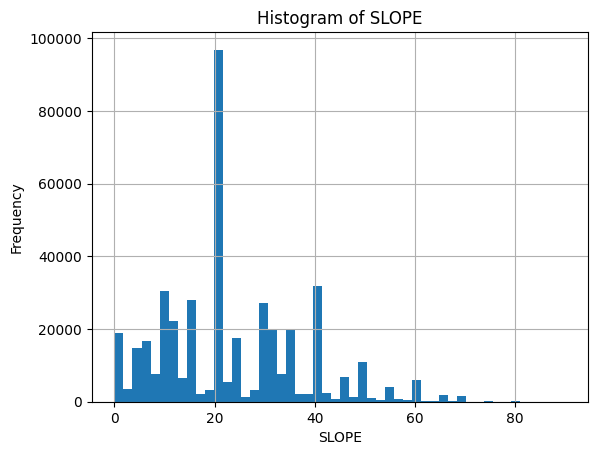

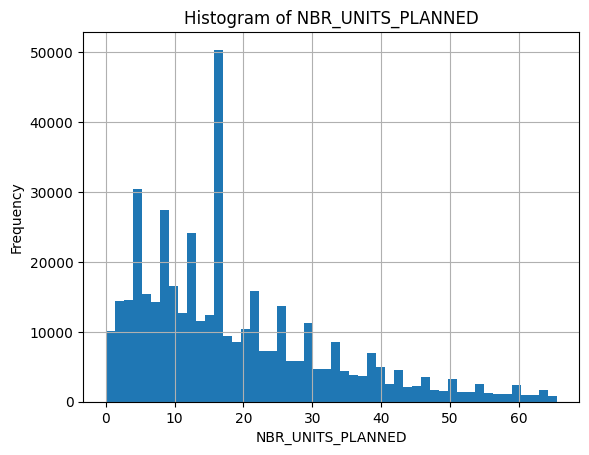

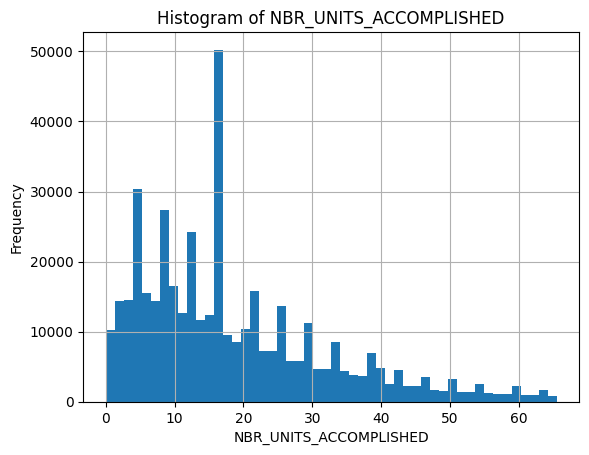

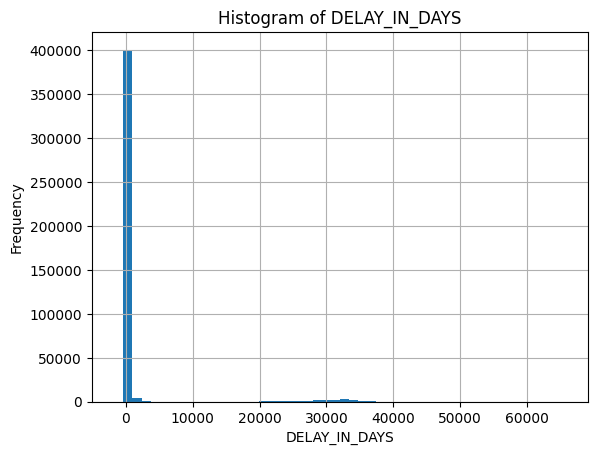

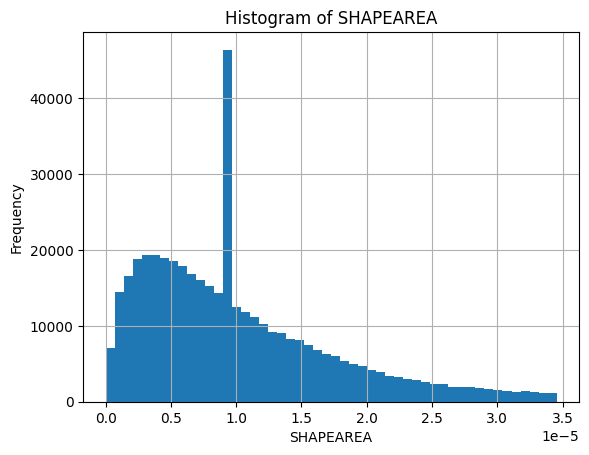

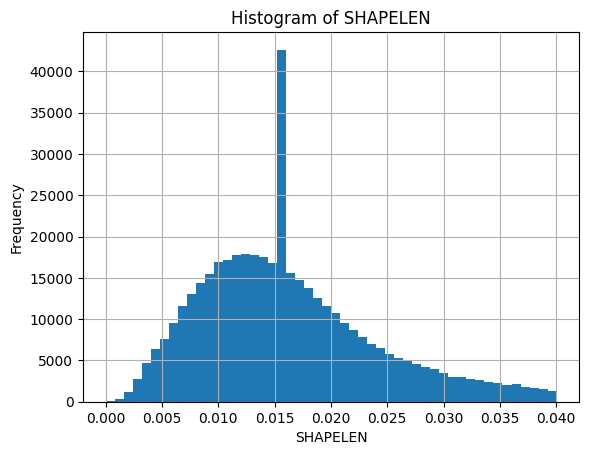

In [ ]:
histos = [
    'COST_PER_UOM', 'GIS_ACRES', 'ELEVATION', 'SLOPE', 'NBR_UNITS_PLANNED', 'NBR_UNITS_ACCOMPLISHED', 'DELAY_IN_DAYS', 'SHAPEAREA', 'SHAPELEN'
]

for col in histos:
    df[col].hist(bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()